# Семинар №3 по курсу "Распознавание образов"

## Корреляционная матрица. Метод Главных Компонент (МГК). Многомерное нормальное распределение. Расстояние Махаланобиса.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Корреляционные матрицы

В случае многомерной случайной величины (случайного вектора) характеристикой разброса ее составляющих и связей между ними является **ковариационная матрица**.

Ковариационная матрица случайного вектора — квадратная симметрическая неотрицательно определенная матрица, на диагонали которой располагаются дисперсии компонент вектора, а внедиагональные элементы — ковариации между компонентами.

Ковариационная матрица определяется как математическое ожидание произведения центрированного случайного вектора на тот же, но транспонированный вектор:

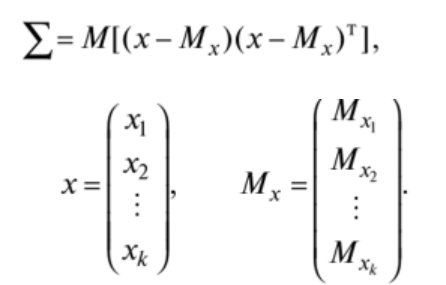

Для примера рассмотрим ковариационную матрицу двумерного вектора

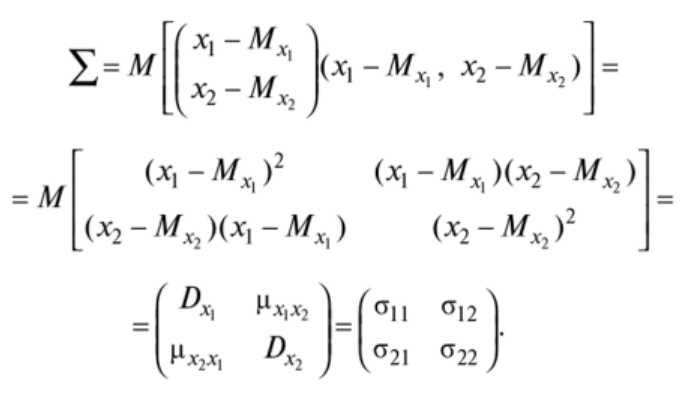

Ковариационная матрица имеет следующий вид, где по диагонали стоят дисперсии координат случайного вектора, а остальные элементы представляют собой ковариации между координатами.

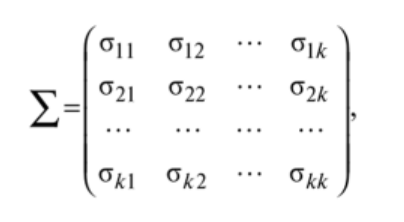

Коэффициентом корреляции называется отношение ковариации к произведению средних квадратичных отклонений:

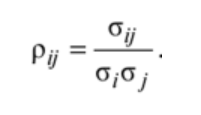

После нормирования по последнему соотношению членов ковариационной матрицы получают **корреляционную матрицу**, которая является симметрической и неотрицательно определенной.

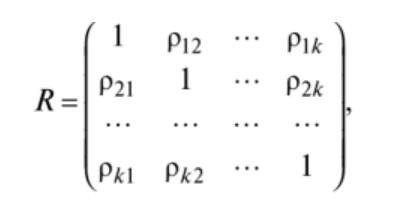

## Задача №1

Для некоторого
трехмерного случайного вектора
X известна его
ковариационная матрица:

$$ {C_{x}} = \begin{bmatrix}
4 & 1 & 4.5\\
1 & 1 & 1.5\\
4.5 & 1.5 & 9\\
\end{bmatrix} $$

Найти коэффициенты корреляции 1-го и 3-го, а также 2-го и 3-го
компонентов вектора.

Запишем матрицу в виде np.array:

In [4]:
Cx=np.array([[4,1,4.5],[1,1,1.5],[4.5,1.5,9]])
Cx

array([[4. , 1. , 4.5],
       [1. , 1. , 1.5],
       [4.5, 1.5, 9. ]])

Найдем коэффициент корреляции согласно формуле:

In [5]:
k = Cx[0,2]/(math.sqrt(Cx[2,2])*math.sqrt(Cx[0,0]))
k

0.75

Выполнитм пересчет матрицы ковариации в матрицу корреляции с использованием cov2corr из библиотеки statsmodels: 

In [6]:
from statsmodels.stats.moment_helpers import cov2corr
cov2corr(Cx)

array([[1.  , 0.5 , 0.75],
       [0.5 , 1.  , 0.5 ],
       [0.75, 0.5 , 1.  ]])

## Задача №2

Построить корреляционную матрицу для двумерного случайного вектора
X по результатам четырех измерений:

$$ {X_{1}} = \begin{bmatrix}
1 \\
4 \\
\end{bmatrix}, {X_{2}} = \begin{bmatrix}
0 \\
7 \\
\end{bmatrix} , {X_{3}} = \begin{bmatrix}
4 \\
6 \\
\end{bmatrix}, {X_{4}} = \begin{bmatrix}
3 \\
7 \\
\end{bmatrix}$$

Найти коэффициенты корреляции компонентов этого вектора.

Запишем матрицу в виде np.array:

In [7]:
data=np.array([[1,4],[0,7],[4,6],[3,7]])
data

array([[1, 4],
       [0, 7],
       [4, 6],
       [3, 7]])

Напишем функцию расчета матрицы ковариации:

In [44]:
def covMat(x,y):

  mean_x, mean_y = x.mean(), y.mean()

  return np.dot((x - mean_x),(y-mean_y).T)/(len(x))

print("Коэффициент ковариации для y {} == Дисперсия y {}".format(covMat(data[:,1],data[:,1]), data[:,1].std()**2))

Коэффициент ковариации для y 1.5 == Дисперсия y 1.4999999999999998


Рассчитаем матрицу ковариации:

In [45]:
#cov matric
n,m = data.shape
cov_matrix = np.zeros((m,m))
for i in range(m):
  for j in range(m):
    cov_matrix[i,j] = covMat(data[:,i],data[:,j])

cov_matrix



array([[2.5 , 0.25],
       [0.25, 1.5 ]])

И с использованием np.cov:

In [46]:
np.cov(data.T, bias=True)

array([[2.5 , 0.25],
       [0.25, 1.5 ]])

Рассчитаем матрицу корреляции:

In [48]:
#corr matric
n,m = data.shape
corr_matrix = np.zeros((m,m))
for i in range(m):
  for j in range(m):
    corr_matrix[i,j] = covMat(data[:,i], data[:,j])/(data[:,i].std()*data[:,j].std())

corr_matrix

array([[1.        , 0.12909944],
       [0.12909944, 1.        ]])

И с использованием np.corrcoef:

In [49]:
np.corrcoef(data.T)

array([[1.        , 0.12909944],
       [0.12909944, 1.        ]])

## Задача №3

Построить корреляционную матрицу для трехмерного случайного вектора X, для которого зарегистрированы реализации:

$$ {X_{1}} = \begin{bmatrix}
1 \\
2 \\
1 \\
\end{bmatrix}, {X_{2}} = \begin{bmatrix}
-1 \\
1 \\
3 \\
\end{bmatrix} , {X_{3}} = \begin{bmatrix}
6 \\
3 \\
-1 \\
\end{bmatrix}$$

Найти коэффициенты корреляции 1-го и 3-го, а также 2-го и 3-го компонентов вектора.

Запишем матрицу в виде np.array:

In [50]:
data=np.array([[1,-1,6],[2,1,3],[1,3,-1]])
data

array([[ 1, -1,  6],
       [ 2,  1,  3],
       [ 1,  3, -1]])

Рассчитаем матрицу ковариации с np.cov:

In [51]:
np.cov(data.T, bias=True)

array([[ 0.22222222,  0.        ,  0.11111111],
       [ 0.        ,  2.66666667, -4.66666667],
       [ 0.11111111, -4.66666667,  8.22222222]])

Рассчитаем матрицу ковариации с covMat:

In [54]:
#cov matric
n,m = data.shape
cov_matrix = np.zeros((m,m))
for i in range(m):
  for j in range(m):
    cov_matrix[i,j] = covMat(data[:,i],data[:,j])

cov_matrix


array([[ 0.22222222,  0.        ,  0.11111111],
       [ 0.        ,  2.66666667, -4.66666667],
       [ 0.11111111, -4.66666667,  8.22222222]])

Проверим, что коэффициент ковариации равен дисперсии:

In [55]:
data[:,0].var()

0.2222222222222222

Рассчитаем матрицу корреляции:

In [56]:
np.corrcoef(data)

array([[ 1.        ,  0.97072534, -0.97072534],
       [ 0.97072534,  1.        , -1.        ],
       [-0.97072534, -1.        ,  1.        ]])

Запишем в виде DataFrame и выведем матрицу корреляции:

In [58]:
import pandas as pd
df = pd.DataFrame(data.T)
df.corr()

,0,1,2
0,1.000000,0.970725,-0.970725
1,0.970725,1.000000,-1.000000
2,-0.970725,-1.000000,1.000000


Добавим градиент

In [60]:
df.corr().style.background_gradient(cmap = 'Blues')

,0,1,2
0,1.000000,0.970725,-0.970725
1,0.970725,1.000000,-1.000000
2,-0.970725,-1.000000,1.000000


Выведем тепловую карту корреляции с помощью seaborn

<Axes: >

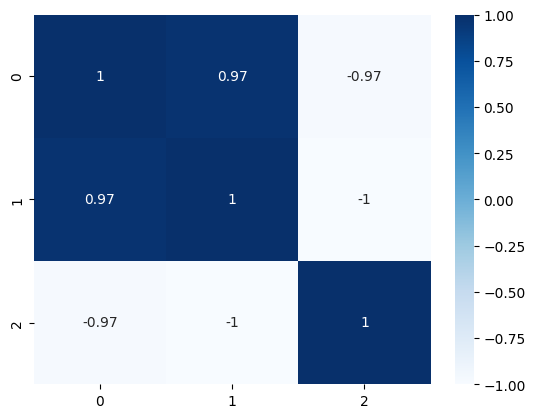

In [59]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

# Метод Главных Компонент (МГК)

**Что такое Метод Главных Компонент?**

Количество главных компонент равно числу изначальных переменных, и они строятся таким образом, что первый главный компонент учитывает максимально возможную дисперсию в наборе данных. Например, предположим, что диаграмма рассеяния нашего набора данных выглядит так, как показано ниже. Можем ли мы угадать первый главный компонент? Да, это линия, вдоль которой точки сильней всего раскиданы. Или, говоря математически, это линия максимизирует дисперсию.

Второй главный компонент рассчитывается таким же образом, при условии, что он не коррелирован (то есть перпендикулярен) первому главному компоненту и учитывает следующую по величине дисперсию. Это продолжается до тех пор, пока не будет вычислено общее количество p главных компонент, равное исходному количеству переменных.

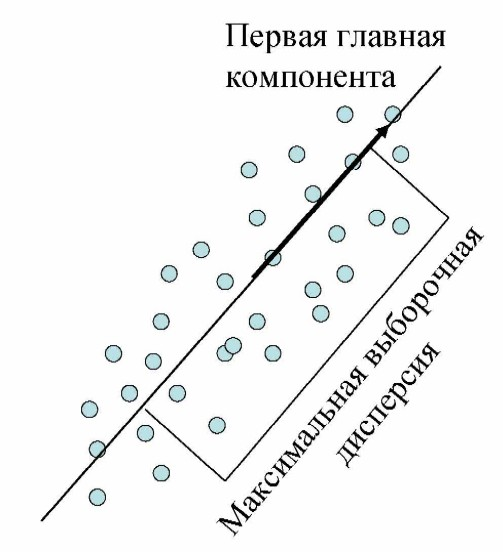

**Собственный вектор** — понятие в линейной алгебре, определяемое для произвольного линейного оператора как ненулевой вектор, применение к которому оператора даёт коллинеарный вектор — тот же вектор, умноженный на некоторое скалярное значение. Скаляр, на который умножается собственный вектор под действием оператора, называется собственным числом (или собственным значением) линейного оператора, соответствующим данному собственному вектору. Одним из представлений линейного оператора является квадратная матрица, поэтому собственные векторы и собственные значения часто определяются в контексте использования таких матриц.

$$ Mx=lx $$

**Определение**: ненулевой вектор, который при умножении на некоторую квадратную матрицу (M) превращается в самого же себя с числовым коэффициентом , называется **собственным вектором** (x) матрицы. Число  называют собственным значением или **собственным числом** (l) данной матрицы.

## Задача №4

Проверить, являются ли вектора $\begin{bmatrix}
3\\
2\\
1\\
\end{bmatrix}$, $\begin{bmatrix}
0\\
1\\
0\\
\end{bmatrix}$ собственными для матрицы  $\begin{bmatrix}
6 & 0 & 2\\
-3 & 2 & 2\\
4 & 0 & -3\\
\end{bmatrix} $.

Определить соответствующие собственные числа.

Запишем матрицу в виде np.array:

In [42]:
matrix=np.array([[6,0,2],[-3,2,2],[4,0,-3]])
matrix

array([[ 6,  0,  2],
       [-3,  2,  2],
       [ 4,  0, -3]])

Проверим, является ли первый вектор собственным веткором матрицы:

In [47]:
np.dot(matrix, np.array([3,2,1]))

array([20, -3,  9])

Проверим, является ли второй вектор собственным веткором матрицы:

In [48]:
np.dot(matrix, np.array([0,1,0]))

array([0, 2, 0])

## Задача №5

Найти собственные числа и собственные векторы матрицы:

$ A = \begin{bmatrix}
-1 & -6\\
2 & 6\\
\end{bmatrix} $

Запишем матрицу в виде np.array:

In [84]:
matrix = np.array([[-1,-6],[2,6]])
a

array([[-1, -6],
       [ 2,  6]])

Найдем собственные вектора и собственные числа с использованием np.linalg.eig:

In [85]:
v, w = np.linalg.eig(matrix)

In [86]:
print('Собственные числа: {}'.format(v))
print('Cобственные вектора {}'.format(w))


Собственные числа: [2. 3.]
Cобственные вектора [[-0.89442719  0.83205029]
 [ 0.4472136  -0.5547002 ]]


Проверим, что вектор собственный:

In [89]:
print('Cобственное число {} и собственный вектор {}'.format(v[0], w[:,0]))

Cобственное число 2.0 и собственный вектор [-0.89442719  0.4472136 ]


In [90]:
print('Результат матричного умножения Mx {}'.format(np.dot(matrix, w[:,0])))

Результат матричного умножения Mx [-1.78885438  0.89442719]


In [91]:
print('Результат матричного умножения lx {}'.format(np.dot(v[0],w[:,0])))

Результат матричного умножения lx [-1.78885438  0.89442719]


## Пример МГК

**Порядок рассчета МГК**

ШАГ 1: СТАНДАРТИЗАЦИЯ

ШАГ 2: РАСЧЕТ МАТРИЦЫ КОВАРИАЦИИ

ШАГ 3. ВЫЧИСЛЕНИЕ СОБСТВЕННЫХ ВЕКТОРОВ И СОБСТВЕННЫХ ЗНАЧЕНИЙ КОВАРИАЦИОННОЙ МАТРИЦЫ

ШАГ 4: МАТРИЦА ГЛАВНЫХ КОМПОНЕНТ

ШАГ 5: ПРЕОБРАЗОВАНИЕ ДАННЫХ ПО ОСЯМ ОСНОВНЫХ КОМПОНЕНТ

Загрузим известный датасет с ирисами

In [103]:
from sklearn import datasets
X=datasets.load_iris()['data']
print('Размерность данных {}'.format(X.shape))
pd.DataFrame(X).head(5)

Размерность данных (150, 4)


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
#Выполним стандартизацию данных z = (x - u) / s, где u - среднее, s - стандартное отклонение
X_scaled = StandardScaler().fit_transform(X)
print('Размерность данных {}'.format(X_scaled.shape))
pd.DataFrame(X_scaled).head(5)

Размерность данных (150, 4)


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Применим метод главных компонент (МГК) - PCA

In [106]:
#n_components - количество компонент, которое хотим посчитать, максимальное кол-во компонент - кол-во признаков
pca = PCA(n_components=4)
pca.fit(X_scaled)
#Главные оси в пространстве признаков, представляющие направления максимальной дисперсии в данных. 
print('Главные оси в пространстве признаков, представляющие направления максимальной дисперсии в данных: {}'.format(pca.components_))
print('Количество дисперсии, объясненной каждым из выбранных компонентов: {}'.format(pca.explained_variance_))
print('Процент дисперсии, объясненной каждым из выбранных компонентов: {}'.format(pca.explained_variance_ratio_))

Главные оси в пространстве признаков, представляющие направления максимальной дисперсии в данных: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
Количество дисперсии, объясненной каждым из выбранных компонентов: [2.93808505 0.9201649  0.14774182 0.02085386]
Процент дисперсии, объясненной каждым из выбранных компонентов: [0.72962445 0.22850762 0.03668922 0.00517871]


In [126]:
#применим fit_transform или transform, если модель уже обучена, чтобы получить новые компоненты (переход в новое признаковое пространство)
pd.DataFrame(pca.fit_transform(X_scaled)).head(5)

,0,1,2,3
0,-2.264703,0.480027,0.127706,-0.024168
1,-2.080961,-0.674134,0.234609,-0.103007
2,-2.364229,-0.341908,-0.044201,-0.028377
3,-2.299384,-0.597395,-0.091290,0.065956
4,-2.389842,0.646835,-0.015738,0.035923


In [129]:
#выставим n_components=3
pca = PCA(n_components=3)
pca.fit(X_scaled)
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]]
[2.93808505 0.9201649  0.14774182]
[0.72962445 0.22850762 0.03668922]


In [130]:
#переход в новое признаковое пространство с n_components=3
pd.DataFrame(pca.transform(X_scaled)).head(5)

,0,1,2
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


Рассчитаем собственные вектора и собственные числа:

In [115]:
c = np.cov(X_scaled.T)
v, vec = np.linalg.eig(c)
print('Собственные вектора: {}'.format(vec.T))
print('Собственные числа: {}'.format(v))

Собственные вектора: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
Собственные числа: [2.93808505 0.9201649  0.14774182 0.02085386]


In [132]:
#переход в новое признаковое пространство
pd.DataFrame(np.dot(X_scaled, vec)).head(5)

,0,1,2,3
0,-2.264703,-0.480027,-0.127706,0.024168
1,-2.080961,0.674134,-0.234609,0.103007
2,-2.364229,0.341908,0.044201,0.028377
3,-2.299384,0.597395,0.091290,-0.065956
4,-2.389842,-0.646835,0.015738,-0.035923


Посмотрим как рассчитывается новое признаковое пространство

Еще раз продублируем X_scaled, назовем признаки 'x1', 'x2', 'x3', 'x4'

In [140]:
feature = ['x1', 'x2', 'x3', 'x4']
pd.DataFrame(X_scaled, columns = feature).head(5)

,x1,x2,x3,x4
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Применим PCA

In [142]:
pca = PCA(n_components=4)
pca.fit(X_scaled)
print('Главные оси в пространстве признаков, представляющие направления максимальной дисперсии в данных: {}'.format(pca.components_))
print('Количество дисперсии, объясненной каждым из выбранных компонентов: {}'.format(pca.explained_variance_))
print('Процент дисперсии, объясненной каждым из выбранных компонентов: {}'.format(pca.explained_variance_ratio_))

Главные оси в пространстве признаков, представляющие направления максимальной дисперсии в данных: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
Количество дисперсии, объясненной каждым из выбранных компонентов: [2.93808505 0.9201649  0.14774182 0.02085386]
Процент дисперсии, объясненной каждым из выбранных компонентов: [0.72962445 0.22850762 0.03668922 0.00517871]


In [144]:
print('Определим как рассчитываются компоненты:')
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.5f x %s" % (value, name) for value, name in zip(component, feature)))

Опредлим как рассчитываются компоненты:
1 component: 72.96% of initial variance
0.52107 x x1 + -0.26935 x x2 + 0.58041 x x3 + 0.56486 x x4
2 component: 22.85% of initial variance
0.37742 x x1 + 0.92330 x x2 + 0.02449 x x3 + 0.06694 x x4
3 component: 3.67% of initial variance
0.71957 x x1 + -0.24438 x x2 + -0.14213 x x3 + -0.63427 x x4
4 component: 0.52% of initial variance
-0.26129 x x1 + 0.12351 x x2 + 0.80145 x x3 + -0.52360 x x4


Давайте подставим 'x1', 'x2', 'x3', 'x4' из X_scaled и проверим результат рассчета 1 компоненты

In [146]:
vector0 = pd.DataFrame(X_scaled, columns = feature).loc[0]
vector0

x1   -0.900681
x2    1.019004
x3   -1.340227
x4   -1.315444
Name: 0, dtype: float64

In [151]:
component1 = 0.52107 * vector0['x1'] + -0.26935 * vector0['x2'] + 0.58041 * vector0['x3'] + 0.56486 * vector0['x4']
print('component1 = {}'.format(component1))

component1 = -2.2647095024058226


In [149]:
#Результат рассчета компонент
pd.DataFrame(pca.transform(X_scaled), columns = ['1 component', '2 component', '3 component', '4 component']).head(5)

,1 component,2 component,3 component,4 component
0,-2.264703,0.480027,0.127706,-0.024168
1,-2.080961,-0.674134,0.234609,-0.103007
2,-2.364229,-0.341908,-0.044201,-0.028377
3,-2.299384,-0.597395,-0.091290,0.065956
4,-2.389842,0.646835,-0.015738,0.035923


# Многомерное нормальное распределение

Плотность многомерного нормального распределения записывается в виде следующей формулы:
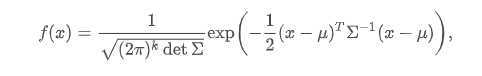

Примеры двумерных нормальных плотностей:

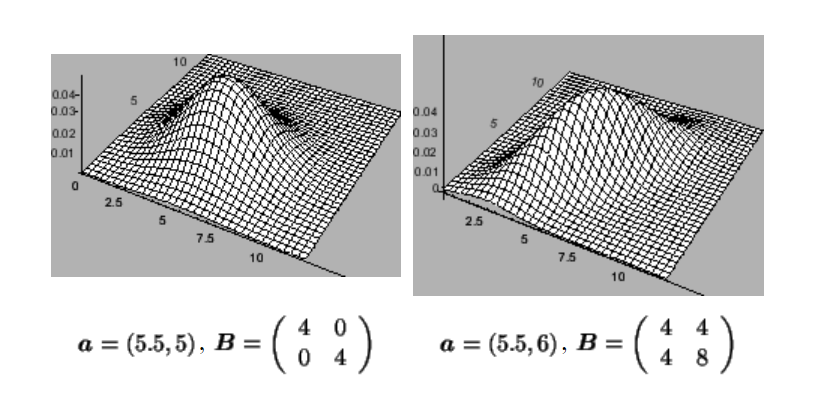

## Задача №6

Записать плотность вероятности многомерного нормального распределения для двумерного случайного вектора из задачи №2.

Двумерный случайный вектор X по результатам четырех измерений:

$$ {X_{1}} = \begin{bmatrix}
1 \\
4 \\
\end{bmatrix}, {X_{2}} = \begin{bmatrix}
0 \\
7 \\
\end{bmatrix} , {X_{3}} = \begin{bmatrix}
4 \\
6 \\
\end{bmatrix}, {X_{4}} = \begin{bmatrix}
3 \\
7 \\
\end{bmatrix}$$

In [213]:
#плотность многомерного нормального распределения
def mnr(x,data):
    #рассчитаем матрицу ковариации
    B=np.cov(data, rowvar=False)
    
    #вычислим определитель матрицы
    B_det=np.linalg.det(B)
    
    #вычислим обратную матрицу
    B_inv = np.linalg.inv(B)
    
    #вычислим обратную матрицу                   
    mu=data.mean()

    #Плотность вероятности вектора x (по формуле)
    p=(1/(2*math.pi*B_det**(0.5)))*math.exp(-0.5*np.dot(np.dot((x-mu).T,B_inv),(x-mu)))
    return p

data=np.array([[1,4],[0,7],[4,6],[3,7]])
x = [1,1]
'Плотность вероятности вектора x: {}'.format(mnr(x, data))

'Плотность вероятности вектора x: 0.0025252294977108286'

# Визуализация МГК

Рассмотрим набор данных, который сэмплирован из многомерного нормального распределения с матрицей ковариации $C = \begin{pmatrix} 4 & 1 \\ 1 & 2 \end{pmatrix}$.

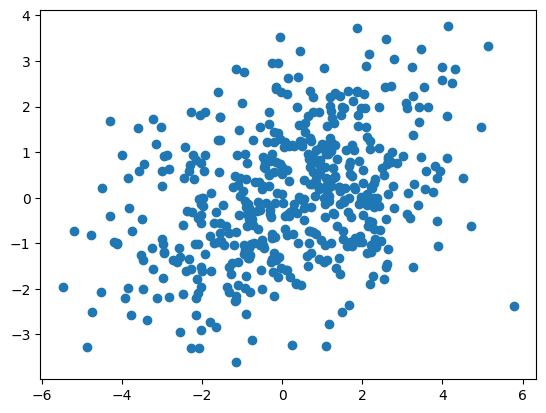

In [185]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[4,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=500)
plt.scatter(data[:,0], data[:,1])
plt.show()

In [186]:
np.cov(data.T)

array([[4.14211358, 0.99829294],
       [0.99829294, 2.00593449]])

Путём диагонализации истинной матрицы ковариаций $C$, мы можем найти преобразование исходного набора данных, компоненты которого наилучшим образом будут описывать дисперсию, с учётом их ортогональности друг другу:

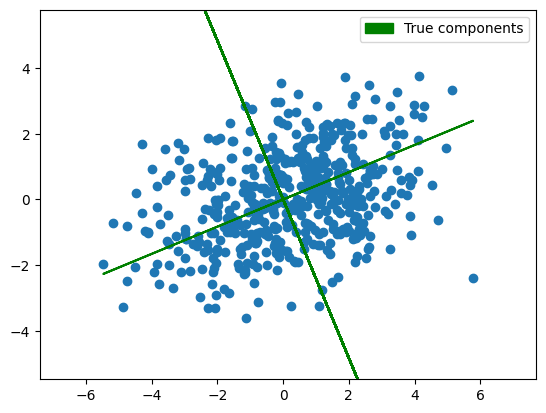

In [193]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

v, W_true = np.linalg.eig(C)
plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

А теперь сравним эти направления с направлениями, которые выбирает метод главных компонент:

In [191]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    print('Матрица ковариации:', model.get_covariance())
    print('Главные оси:',W_pca)
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

Видно, что уже при небольшом количестве данных они отличаются незначительно. Если увеличим размер выборки, то в этом случае главные компоненты значительно точнее приближают истинные направления данных, вдоль которых наблюдается наибольшая дисперсия.

Матрица ковариации: [[4.14211358 0.99829294]
 [0.99829294 2.00593449]]
Главные оси: [[ 0.9302081   0.36703254]
 [-0.36703254  0.9302081 ]]
Матрица собственых векторов: [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


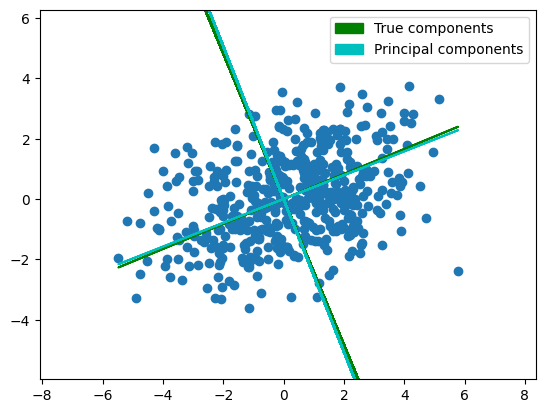

In [195]:
model = PCA()
model.fit(data)
plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
print('Матрица собственых векторов:', W_true)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

# Расстояние Махаланобиса

## Интуитивное объяснение


Рассмотрим задачу определения вероятности того, что некоторая точка в N-мерном евклидовом пространстве принадлежит множеству, которое задано набором точек, определённо принадлежащих данному множеству. Найдем центр масс множества. Интуитивно понятно, что чем ближе заданная точка к центру масс, тем больше вероятность того, что она принадлежит множеству.

Однако также стоит учитывать, на какого размера области рассредоточены точки множества, чтобы понять, насколько значимо расстояние между заданной точкой и центром масс. Самый простой подход заключается в вычислении среднеквадратичного отклонения точек множества от центра масс. Если расстояние между заданной точкой и центром масс меньше среднеквадратичного отклонения, то можно заключить, что вероятность принадлежности точки множеству высока. Чем дальше точка, тем больше вероятность того, что она не принадлежит множеству.

Этот интуитивный подход можно определить математически через расстояние между заданной точкой и множеством по формуле $$ {\displaystyle {x-\mu } \over \sigma } $$. С помощью подстановки этого значения в нормальное распределение можно найти вероятность принадлежности точки множеству.

Недостаток такого подхода заключается в использовании предположения о том, что точки множества сферически распределены вокруг центра масс (то есть равномерно по всем измерениям). Если же распределение явно не сферическое (например, эллипсоидальное), то было бы естественным учитывать в вероятности принадлежности не только расстояние до центра масс, но и направление на него. В направлении короткой оси эллипсоида заданная точка должна быть ближе к центру масс, чтобы принадлежать множеству, в то время как в направлении длинной оси она может быть дальше.

Для записи этого в математическом виде эллипсоид, лучшим образом представляющий вероятностное распределение множества, может быть задан матрицей ковариаций множества. Расстояние Махаланобиса — это просто расстояние между заданной точкой и центром масс, делённое на ширину эллипсоида в направлении заданной точки.

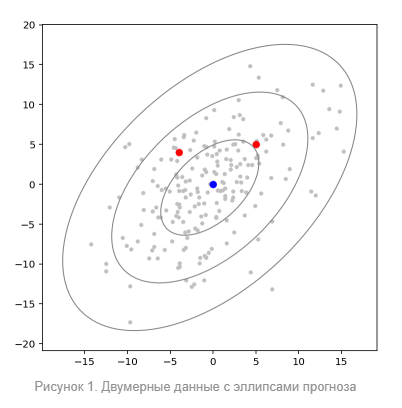

Вопрос — какое наблюдение ближе к центру класса?
Ответ зависит от того, как измеряется расстояние.

Если измерять расстояние по метрике Евклида, то получим, что расстояние от центра класса (0, 0) до точки (-4, 4) равно $ \sqrt {32} $, до точки (5, 5) равно $ \sqrt {50} $, т. е. точка (-4, 4)  ближе к центру класса.

Однако для этого распределения дисперсия в направлении Y меньше, чем дисперсия в направлении X, поэтому в некотором смысле точка (-4, 4) находится «на большем стандартном отклонении» от центра класса, чем (5, 5).

Эллипсы прогноза, изображенные на рисунке, подсказывают, что точка (5, 5) ближе по распределению, чем точка (-4, 4). Измерив расстояние по Махаланобису, получим, что расстояние от центра класса (0, 0) до точки (-4, 4) примерно равно 0.15686, до точки (5, 5) примерно равно 0.07519, т. е. точка (5, 5) ближе к центру класса. В этом и заключается основной смысл использования метрики Махаланобиса — учитывание дисперсий и ковариаций.

Кроме того, расстояние Махаланобиса предполагает, что точки множества эллипсоидально (частный случай — сферически) распределены вокруг центра масс.

## Формула

Формально, расстояние Махаланобиса от многомерного вектора $ {\displaystyle x=(x_{1},x_{2},x_{3},\dots ,x_{N})^{T}} $ до множества со средним значением $ {\displaystyle \mu =(\mu _{1},\mu _{2},\mu _{3},\dots ,\mu _{N})^{T}}\ $ и матрицей ковариации $ {\displaystyle S} $ определяется следующим образом:

$$ {\displaystyle D_{M}(x)={\sqrt {(x-\mu )^{T}S^{-1}(x-\mu )}}.} $$
Расстояние Махаланобиса также можно определить как меру несходства между двумя случайными векторами $ {\displaystyle {\vec {x}}} $ и $ {\displaystyle {\vec {y}}} $ из одного распределения вероятностей с матрицей ковариации $ {\displaystyle S} $: $$ {\displaystyle d({\vec {x}},{\vec {y}})={\sqrt {({\vec {x}}-{\vec {y}})^{T}S^{-1}({\vec {x}}-{\vec {y}})}}.} $$

Если матрица ковариации является единичной матрицей, то расстояние Махаланобиса становится равным расстоянию Евклида. Если матрица ковариации диагональная (но необязательно единичная), то получившаяся мера расстояния носит название нормализованное расстояние Евклида:

$$ {\displaystyle d({\vec {x}},{\vec {y}}) {\sqrt {\sum _{i=1}^{N}{(x_{i}-y_{i})^{2}\over \sigma _{i}^{2}}}}} $$

Здесь $ \sigma _{i} $ — среднеквадратичное отклонение $ {\displaystyle x_{i}} $ от $ {\displaystyle y_{i}} $ в выборке.

## Задача №7

Найти расстояние Махаланобиса между двумя векторами в двумерном пространстве, если эти вектора подчиняются двумерному нормальному распределению из задачи № 6:

$$ a) {X_{1}} = \begin{bmatrix}
17 \\
20 \\
\end{bmatrix}, {X_{2}} = \begin{bmatrix}
0 \\
-14 \\
\end{bmatrix} б) {X_{1}} = \begin{bmatrix}
3 \\
40 \\
\end{bmatrix}, {X_{2}} = \begin{bmatrix}
20 \\
26 \\
\end{bmatrix}$$

In [216]:
# из задачи 6
data=np.array([[1,4],[0,7],[4,6],[3,7]])
B=np.cov(data, rowvar=False)

In [217]:
#формула рассчета расстояния Махаланобиса
def mahalanobis_custom(x1, x2, cov):
    x = x1 - x2
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x, inv_covmat)
    mahal = np.dot(left, x.T)
    return math.sqrt(mahal)

In [218]:
x1 = np.array([17., 20.])
x2 = np.array([0., -14.])
mahalanobis_custom(x1, x2, B)

24.84323732282019

In [219]:
from scipy.spatial import distance
distance.mahalanobis(x1,x2,np.linalg.inv(B))

24.84323732282019

## Пример нахождения расстояния от точки до точек класса

Алгоритм вычисления расстояния между двумя точками и между точкой и классом

Шаг 1. Вычислить математические ожидания значений признаков точек класса.

Шаг 2. Вычислить среднеквадратические отклонения значений признаков точек класса.

Шаг 3. Вычислить ковариации между всеми парами признаков точек класса и составить ковариационную матрицу.

Шаг 4. Если матрица обратима, то вычислить расстояние по Махаланобису.

In [215]:
import numpy as np

def mahalanobis(point_from, point_to, inverse_covariance_matrix):
    delta = point_from - point_to
    return max(np.float64(0), np.dot(np.dot(delta, inverse_covariance_matrix), delta)) ** 0.5


test_point = np.array([17., 20.])
class_ = np.array([[1., 1.], [2., 2.], [3., 3.], [4., 4.], [5., 5.]])
covariance_matrix = np.cov(class_, rowvar=False, ddof=1)
inverse_covariance_matrix = np.linalg.inv(covariance_matrix + np.identity(covariance_matrix.shape[0]))
print("Обратная ковариационная матрица:\n", inverse_covariance_matrix, sep='')

for point_to in [class_.mean(axis=0), *class_]:
    print("d_E-M (", test_point, ", ", point_to, ", (COV+E)^(-1)) = ",
          mahalanobis(test_point, point_to, inverse_covariance_matrix), sep='')

Обратная ковариационная матрица:
[[ 0.58333333 -0.41666667]
 [-0.41666667  0.58333333]]
d_E-M ([17. 20.], [3. 3.], (COV+E)^(-1)) = 9.196919774214264
d_E-M ([17. 20.], [1. 1.], (COV+E)^(-1)) = 10.32392044396572
d_E-M ([17. 20.], [2. 2.], (COV+E)^(-1)) = 9.759610647971568
d_E-M ([17. 20.], [3. 3.], (COV+E)^(-1)) = 9.196919774214264
d_E-M ([17. 20.], [4. 4.], (COV+E)^(-1)) = 8.636164272021077
d_E-M ([17. 20.], [5. 5.], (COV+E)^(-1)) = 8.077747210701755
